In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

img = cv2.imread("/content/drive/Shareddrives/BME_AI/eye_tracking/pic.jpg")
gray_picture = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)#make picture gray
faces = face_cascade.detectMultiScale(gray_picture, scaleFactor=1.3, minNeighbors=5)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
plt.imshow(img, cmap='gray')
plt.show()


gray_face = gray_picture[y:y+h, x:x+w] # cut the gray face frame out
face = img[y:y+h, x:x+w] # cut the face frame out
eyes = eye_cascade.detectMultiScale(gray_face)

for (ex,ey,ew,eh) in eyes: 
    cv2.rectangle(face,(ex,ey),(ex+ew,ey+eh),(0,225,255),2)
plt.imshow(img, cmap='gray')
plt.show()

[ WARN:0@0.510] global loadsave.cpp:244 findDecoder imread_('/content/drive/Shareddrives/BME_AI/eye_tracking/pic.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [5]:
#Blob detection algorithm
detector_params = cv2.SimpleBlobDetector_Params()
detector_params.filterByArea = True
detector_params.maxArea = 1500
detector = cv2.SimpleBlobDetector_create(detector_params)

In [6]:
def detect_eyes(img, classifier):
    gray_frame = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    eyes = classifier.detectMultiScale(gray_frame, 1.3, 5) # detect eyes
    width = np.size(img, 1) # get face frame width
    height = np.size(img, 0) # get face frame height
    for (x, y, w, h) in eyes:
        if y > height / 2:
            pass
        eyecenter = x + w / 2  # get the eye center
        if eyecenter < width * 0.5:
            left_eye = img[y:y + h, x:x + w]
        else:
            right_eye = img[y:y + h, x:x + w]
    return left_eye, right_eye

In [7]:
def detect_faces(img, classifier):
    gray_frame = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    coords = classifier.detectMultiScale(gray_frame, 1.3, 5)
    if len(coords) > 1:
        biggest = (0, 0, 0, 0)
        for i in coords:
            if i[3] > biggest[3]:
                biggest = i
        biggest = np.array([i], np.int32)
    elif len(coords) == 1:
        biggest = coords
    else:
        return None
    for (x, y, w, h) in biggest:
        frame = img[y:y + h, x:x + w]
    return frame

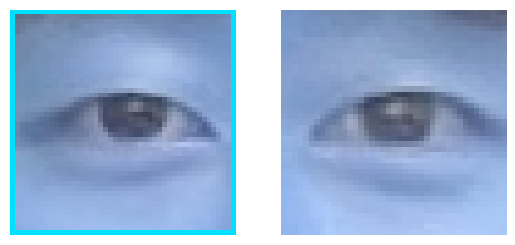

In [8]:
left, right = detect_eyes(img, eye_cascade)
plt.subplot(121)
plt.imshow(left)
plt.axis("off")

plt.subplot(122)
plt.imshow(right)
plt.axis("off")
plt.show()

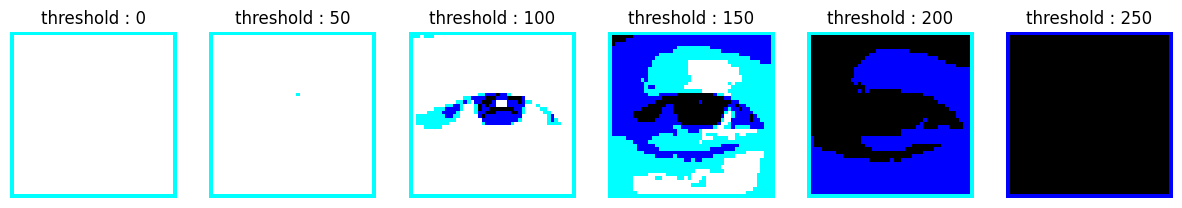

In [9]:
 plt.figure(figsize=(15,7))
 for i in range(0, 255, 50): 
   threshold=i
   _, v1_img = cv2.threshold(left, threshold, 255, cv2.THRESH_BINARY)
   plt.subplot(1,6,int(i/50)+1)
   plt.title(f"threshold : {i}")
   plt.imshow(v1_img)
   plt.axis("off")
plt.show()

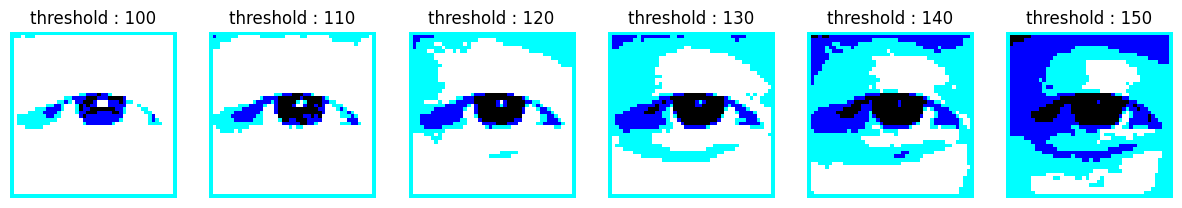

In [10]:
 plt.figure(figsize=(15,7))
 for i in range(100, 155, 10): 
   threshold=i
   _, v1_img = cv2.threshold(left, threshold, 255, cv2.THRESH_BINARY)
   plt.subplot(1,6,int((i-100)/10)+1)
   plt.title(f"threshold : {i}")
   plt.imshow(v1_img)
   plt.axis("off")
plt.show()

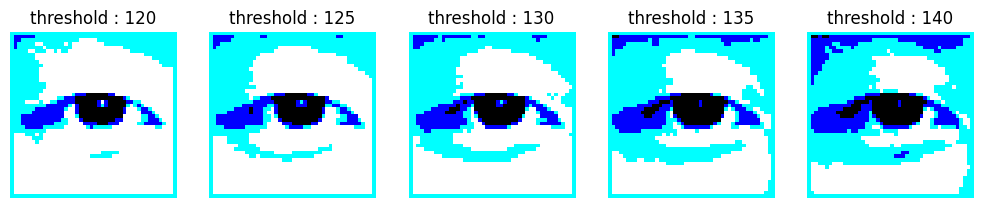

In [11]:
 plt.figure(figsize=(15,7))
 for i in range(120, 145, 5): 
   threshold=i
   _, v1_img = cv2.threshold(left, threshold, 255, cv2.THRESH_BINARY)
   plt.subplot(1,6,int((i-120)/5)+1)
   plt.title(f"threshold : {i}")
   plt.imshow(v1_img)
   plt.axis("off")
plt.show()

In [12]:
def blob_process(img, detector, threshold):
    gray_frame = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img = cv2.threshold(gray_frame, threshold, 255, cv2.THRESH_BINARY)
    img = cv2.erode(img, None, iterations=2) #1
    img = cv2.dilate(img, None, iterations=4) #2
    img = cv2.medianBlur(img, 5) #3
    keypoints = detector.detect(img)
    return keypoints

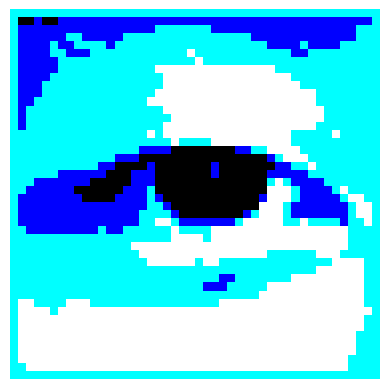

In [13]:
keypoints = blob_process(v1_img, detector, threshold=125)
v2_img = cv2.drawKeypoints(v1_img, keypoints, v1_img, (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(v2_img)
plt.axis("off")
plt.show()

In [2]:
def main():
    cap = cv2.VideoCapture(0)
    cv2.namedWindow('image')
    cv2.createTrackbar('threshold', 'image', 0, 255, nothing)
    while True:
        _, frame = cap.read()
        face_frame = detect_faces(frame, face_cascade)
        if face_frame is not None:
            eyes = detect_eyes(face_frame, eye_cascade)
            for eye in eyes:
                if eye is not None:
                    threshold = cv2.getTrackbarPos('threshold', 'image')
                    eye = cut_eyebrows(eye)
                    keypoints = blob_process(eye, threshold, detector)
                    eye = cv2.drawKeypoints(eye, keypoints, eye, (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        cv2.imshow('image', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
def blob_process(img, threshold, detector):
    gray_frame = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img = cv2.threshold(gray_frame, threshold, 255, cv2.THRESH_BINARY)
    img = cv2.erode(img, None, iterations=2)
    img = cv2.dilate(img, None, iterations=4)
    img = cv2.medianBlur(img, 5)
    keypoints = detector.detect(img)
    print(keypoints)
    return keypoints
def nothing(x):
    pass